In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from datetime import datetime

In [2]:
# Import the requests library
import requests

#import the API key
from config import weather_api_key

In [3]:
# starting URL for Wather Map API Call
url="http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+weather_api_key

In [4]:
# create a set of random latitudes and longitudes combinations
lats=np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs=np.random.uniform(low=-180.000, high=180.000, size=1500)
lats_lngs=zip(lats,lngs)
lats_lngs

In [5]:
# Import Citipy
from citipy import citipy

#Add lats and long to list
coordinates=list(lats_lngs)

In [6]:
# Create a list for holding the cities
cities=[]
#identify the nearest city for each lat and long combination
for coordinate in coordinates:
    city=citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
#Print the city count to confirm sufficient count
len(cities)

615

In [7]:
#Create an empty list to hold the weather data
city_data=[]
#print the beginning of the logging
print("Beginning Data Retrieval       ")
print("-------------------------------")

#Create counters
record_count=1
set_count=1
#Loop through all the cities in our list
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes
    if (i%50==0 and i>=50):
        set_count+=1
        record_count=1
        time.sleep(60)
        
    #Create endpoint URL with each city
    city_url=url+"&q="+ city.replace(" ","+")
    
    #Log the URL, record and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} i {city}")
    
    #Add 1 to the record count
    record_count+=1
    
#Run an API request for each of the cities

    try:
        #Parse the Json and retrieve data
        city_weather=requests.get(city_url).json()
        #Parse out the needed data
        city_lat=city_weather["coord"]["lat"]
        city_lng=city_weather["coord"]["lon"]
        city_max_temp=city_weather["main"]["temp_max"]
        city_humidity=city_weather["main"]["humidity"]
        city_clouds=city_weather["clouds"]["all"]
        city_wind=city_weather["wind"]["speed"]
        city_country=city_weather["sys"]["country"]
        #convert the date to ISO standard
        city_date=datetime.utcfromtimestamp(city_weather["dt"]).strftime("%Y-%m-%d %H:%M:%S")
        #Append the city information into city_Data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    
    #If error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
    
#Indicate that data loading is complete
print("----------------------------")
print("Data Retrieval Complete     ")
print("----------------------------")

Beginning Data Retrieval       
-------------------------------
Processing Record 1 of Set 1 i hilo
Processing Record 2 of Set 1 i tongliao
Processing Record 3 of Set 1 i narsaq
Processing Record 4 of Set 1 i leningradskiy
Processing Record 5 of Set 1 i kahului
Processing Record 6 of Set 1 i toliary
City not found. Skipping...
Processing Record 7 of Set 1 i sao felix do xingu
Processing Record 8 of Set 1 i ushuaia
Processing Record 9 of Set 1 i bengkulu
Processing Record 10 of Set 1 i rikitea
Processing Record 11 of Set 1 i guerrero negro
Processing Record 12 of Set 1 i karratha
Processing Record 13 of Set 1 i praia da vitoria
Processing Record 14 of Set 1 i mantua
Processing Record 15 of Set 1 i bluff
Processing Record 16 of Set 1 i busselton
Processing Record 17 of Set 1 i taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 i saint anthony
Processing Record 19 of Set 1 i buala
Processing Record 20 of Set 1 i san cristobal
Processing Record 21 of Set 1 i riyadh
Process

In [8]:
#Convert the arrary of dictionaries to a Pandas DataFrame
city_data_df=pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hilo,19.7297,-155.0900,73.27,99,49,1.01,US,2022-07-21 14:08:07
1,Tongliao,43.6125,122.2653,71.44,80,100,2.13,CN,2022-07-21 14:08:25
2,Narsaq,60.9167,-46.0500,62.82,67,9,3.47,GL,2022-07-21 14:08:26
3,Leningradskiy,69.3833,178.4167,32.97,98,100,14.16,RU,2022-07-21 14:08:26
4,Kahului,20.8947,-156.4700,73.42,78,100,12.66,US,2022-07-21 14:08:27
5,Sao Felix Do Xingu,-6.6447,-51.9950,90.12,29,5,5.10,BR,2022-07-21 14:08:28
6,Ushuaia,-54.8000,-68.3000,29.82,93,100,12.66,AR,2022-07-21 14:08:28
7,Bengkulu,-3.8004,102.2655,77.22,89,80,4.50,ID,2022-07-21 14:08:29
8,Rikitea,-23.1203,-134.9692,74.05,73,1,7.74,PF,2022-07-21 14:08:29
9,Guerrero Negro,27.9769,-114.0611,68.00,84,97,15.77,MX,2022-07-21 14:08:29


In [9]:
new_column_order=["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hilo,US,2022-07-21 14:08:07,19.7297,-155.0900,73.27,99,49,1.01
1,Tongliao,CN,2022-07-21 14:08:25,43.6125,122.2653,71.44,80,100,2.13
2,Narsaq,GL,2022-07-21 14:08:26,60.9167,-46.0500,62.82,67,9,3.47
3,Leningradskiy,RU,2022-07-21 14:08:26,69.3833,178.4167,32.97,98,100,14.16
4,Kahului,US,2022-07-21 14:08:27,20.8947,-156.4700,73.42,78,100,12.66
5,Sao Felix Do Xingu,BR,2022-07-21 14:08:28,-6.6447,-51.9950,90.12,29,5,5.10
6,Ushuaia,AR,2022-07-21 14:08:28,-54.8000,-68.3000,29.82,93,100,12.66
7,Bengkulu,ID,2022-07-21 14:08:29,-3.8004,102.2655,77.22,89,80,4.50
8,Rikitea,PF,2022-07-21 14:08:29,-23.1203,-134.9692,74.05,73,1,7.74
9,Guerrero Negro,MX,2022-07-21 14:08:29,27.9769,-114.0611,68.00,84,97,15.77


In [10]:
len(city_data)

567

In [11]:
#Create the output file (csv)
output_data_file="weather_data/cities.csv"
#Export the City_Data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevent fields from the DataFrame for plotting
lats=city_data_df["Lat"]
max_temps=city_data_df["Max Temp"]
humidity=city_data_df["Humidity"]
cloudiness=city_data_df["Cloudiness"]
wind_speed=city_data_df["Wind Speed"]

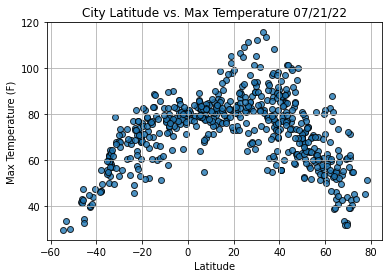

In [13]:
#Import time module
import time

#Build the scatterplot for lat. vs max temp
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig1.png")

#show plot
plt.show()

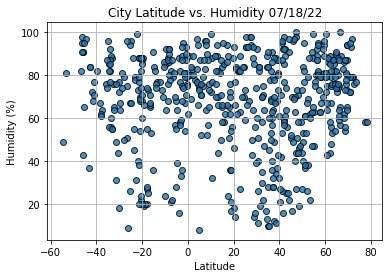

In [31]:
#Build the scatterplot for lat. vs humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig2.png")

#show plot
plt.show()

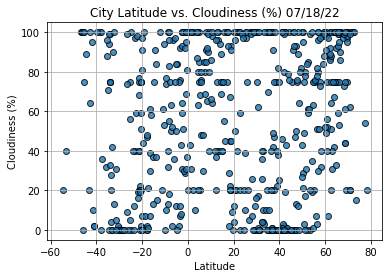

In [32]:
#Build the scatterplot for lat. vs cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig3.png")

#show plot
plt.show()

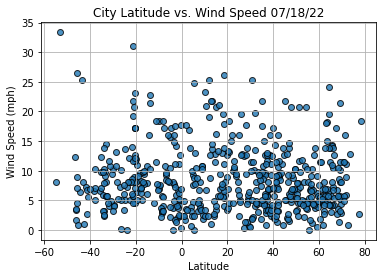

In [38]:
#Build the scatterplot for lat. vs wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig4.png")

#show plot
plt.show()

In [34]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        567 non-null    object 
 1   Country     567 non-null    object 
 2   Date        567 non-null    object 
 3   Lat         567 non-null    float64
 4   Lng         567 non-null    float64
 5   Max Temp    567 non-null    float64
 6   Humidity    567 non-null    int64  
 7   Cloudiness  567 non-null    int64  
 8   Wind Speed  567 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 40.0+ KB


In [50]:
#Create northern and southern hemisphere dataframes
northern_hemi_df=city_data_df.loc[(city_data_df["Lat"]>=0)]
southern_hemi_df=city_data_df.loc[(city_data_df["Lat"]<0)]


In [14]:
#Import Linear regression from the SciPy Stats module
from scipy.stats import linregress
# Create a function to create perform linear regression on the weather data and plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
   
    #Run regression on hemisphere weather data
    (slope, intercept, r_value,p_value, std_err)=linregress(x_values, y_values)
    
    #Calculate the regression line "y values" from teh slope and intercept
    regress_values=x_values*slope+intercept
    
    #Get the equation of the line
    line_eq="y = "+str(round(slope,2))+"x + " + str(round(intercept,2))
    #Create a scatterplot and plot the gression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    #Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()



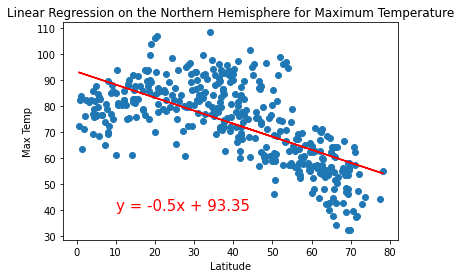

In [57]:
#Linear Regression on the Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Max Temp"]
#Call the function
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere for Maximum Temperature", "Max Temp", (10,40))


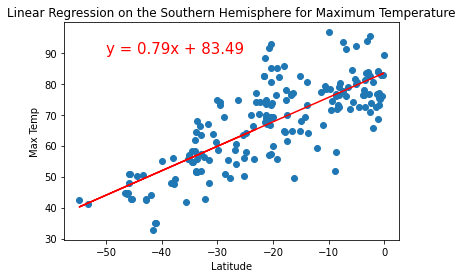

In [59]:
#Linear Regression on the Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Max Temp"]
#Call the function
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere for Maximum Temperature", "Max Temp", (-50,90))


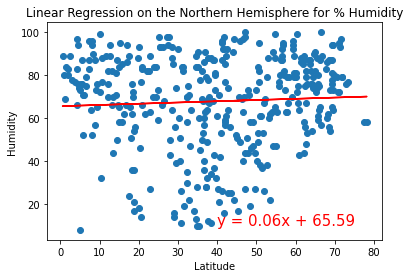

In [60]:
#Linear Regression on the Northern Hemisphere for Humidity
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Humidity"]
#Call the function
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere for % Humidity", "Humidity", (40,10))


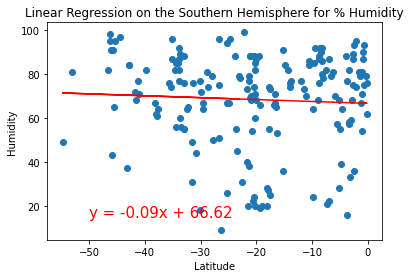

In [61]:
#Linear Regression on the Southern Hemisphere for Humidity
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Humidity"]
#Call the function
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere for % Humidity", "Humidity", (-50, 15))


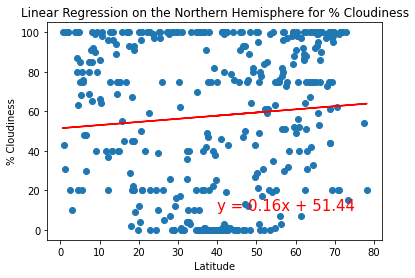

In [63]:
#Linear Regression on the Northern Hemisphere for Cloudiness
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Cloudiness"]
#Call the function
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere for % Cloudiness", "% Cloudiness", (40,10))


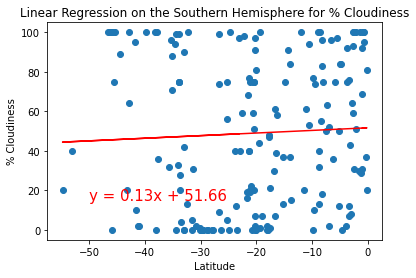

In [64]:
#Linear Regression on the Southern Hemisphere for Cloudiness
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Cloudiness"]
#Call the function
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere for % Cloudiness", "% Cloudiness", (-50, 15))


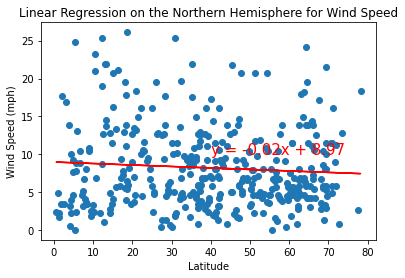

In [65]:
#Linear Regression on the Northern Hemisphere for Wind Speed
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Wind Speed"]
#Call the function
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere for Wind Speed", "Wind Speed (mph)", (40,10))


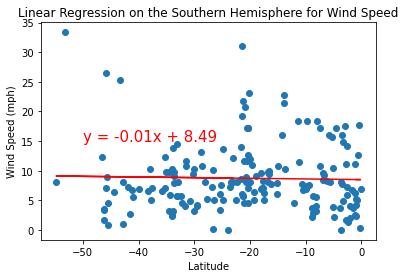

In [66]:
#Linear Regression on the Southern Hemisphere for Wind Speed
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Wind Speed"]
#Call the function
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere for Wind Speed", "Wind Speed (mph)", (-50, 15))
